In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
import h5py
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True

# Path to sledgehamr top directory
sys.path.append('../../sledgehamr')
import pySledgehamr as sledgehamr

exec_dir = "../examples/BetaDecay/"

# Step 1: Create Initial State

This is actually $t$ and not $X_0$. But this way the data is fed into pytorch by the integrator.

In [57]:
N = 64
initial = np.empty((N,N,N))
i = np.arange(N)
initial = 10 * (i[:, np.newaxis, np.newaxis]*N*N + i[np.newaxis, :, np.newaxis]*N + i[np.newaxis, np.newaxis, :]) / (N)**3

archive = h5py.File(exec_dir+'initial_state_64.hdf5', 'w')
archive.create_dataset("X0", data=initial)
archive.close()

# Step 2: Load Final State

In [59]:
output = sledgehamr.Output(exec_dir + 'output')

Number of slices found: 3
Number of coarse boxes found: 3
Number of full boxes found: 0
Number of projections found: 0
Number of spectra found: 0
Number of gravitational wave spectra found: 0
Number of slices of truncation errors found: 0
Number of coarse boxes of truncation errors found: 0
Number of full boxes of truncation errors found: 0


In [66]:
i=1
coarse_box = output.GetCoarseBox(i, ['X0', 'X1'])
X0 = coarse_box['X0'].flatten()
X1 = coarse_box['X1'].flatten()
t = initial.flatten()

X0true = np.exp(-t)
X1true = 1-np.exp(-t)

Text(0.5, 0, '$t$')

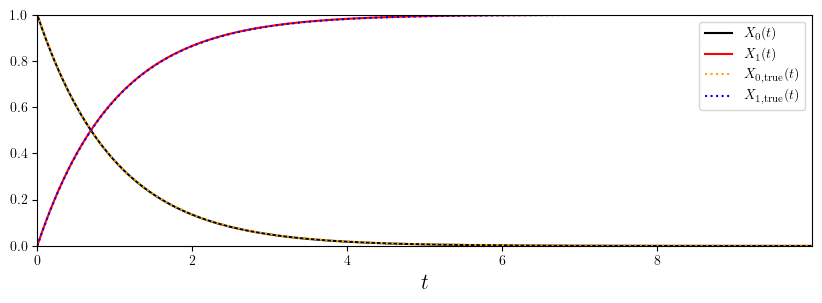

In [87]:
fig = plt.figure(figsize=(10, 3))
plt.plot(t, X0, color='black', label=r'$X_0(t)$')
plt.plot(t, X1, color='red', label=r'$X_1(t)$')
plt.plot(t, X0true, linestyle=':', color='orange', label=r'$X_{0,\mathrm{true}}(t)$')
plt.plot(t, X1true, linestyle=':', color='blue', label=r'$X_{1,\mathrm{true}}(t)$')
plt.xlim(0,np.max(initial))
plt.ylim(0,1)
plt.legend()
plt.xlabel(r'$t$', fontsize=16)

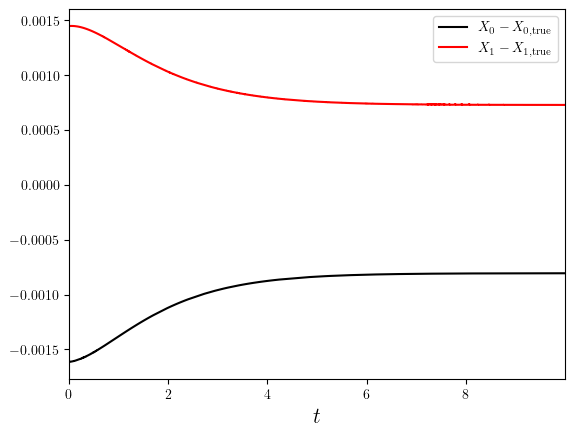

In [91]:
plt.plot(t, X0-X0true, color='black', label=r'$X_0-X_{0,\mathrm{true}}$')
plt.plot(t, X1-X1true, color='red', label=r'$X_1-X_{1,\mathrm{true}}$')
plt.xlim(0,np.max(initial))
plt.xlabel(r'$t$', fontsize=16)
plt.legend()